In [4]:
# pip install fastlmm

In [6]:
import datetime
import numpy as np
from fastlmm.association import snp_set
from pysnptools.snpreader import Bed
from fastlmm.util import example_file # Download and return local file name

In [7]:
# define file names
test_snps_fn = example_file('tests/datasets/synth/chr1.*','*.bed').replace('.bed','')
pheno_fn = example_file("tests/datasets/synth/pheno_10_causals.txt")
cov_fn = example_file("tests/datasets/synth/cov.txt")
set_list_fn = example_file("tests/datasets/synth/chr1.sets.txt")
G0_fn = None

In [8]:
import time

In [13]:
# run SNP-set analysis (LRT)
start_time = time.time()
results_df1 = snp_set(test_snps=test_snps_fn, G0=G0_fn, set_list=set_list_fn, pheno=pheno_fn, covar=cov_fn, test="lrt")
print("--- %s seconds ---" % (time.time() - start_time))

--- 46.601943016052246 seconds ---


In [11]:
# run SNP-set analysis (score)
start_time = time.time()
results_df2 = snp_set(test_snps=test_snps_fn, G0=G0_fn, set_list=set_list_fn, pheno=pheno_fn, covar=cov_fn, test="sc_davies")
print("--- %s seconds ---" % (time.time() - start_time))

--- 6.040044784545898 seconds ---


(<Figure size 360x360 with 1 Axes>,
 array([2.30103000e+00, 1.82390874e+00, 1.60205999e+00, 1.45593196e+00,
        1.34678749e+00, 1.25963731e+00, 1.18708664e+00, 1.12493874e+00,
        1.07058107e+00, 1.02227639e+00, 9.78810701e-01, 9.39302160e-01,
        9.03089987e-01, 8.69666232e-01, 8.38631998e-01, 8.09668302e-01,
        7.82516056e-01, 7.56961951e-01, 7.32828272e-01, 7.09965389e-01,
        6.88246139e-01, 6.67561540e-01, 6.47817482e-01, 6.28932138e-01,
        6.10833916e-01, 5.93459820e-01, 5.76754126e-01, 5.60667306e-01,
        5.45155140e-01, 5.30177984e-01, 5.15700161e-01, 5.01689446e-01,
        4.88116639e-01, 4.74955193e-01, 4.62180905e-01, 4.49771647e-01,
        4.37707136e-01, 4.25968732e-01, 4.14539270e-01, 4.03402904e-01,
        3.92544977e-01, 3.81951903e-01, 3.71611070e-01, 3.61510743e-01,
        3.51639989e-01, 3.41988603e-01, 3.32547047e-01, 3.23306390e-01,
        3.14258261e-01, 3.05394801e-01, 2.96708622e-01, 2.88192771e-01,
        2.79840697e-01, 2.71

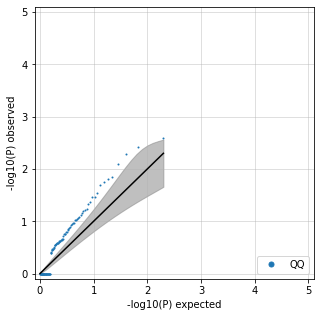

In [19]:
# qq plot
from fastlmm.util.stats import plotp
plotp.qqplot(results_df1["P-value"].values, xlim=[0,5], ylim=[0,5], addlambda=False, legend="QQ")

(<Figure size 360x360 with 1 Axes>,
 array([2.30103000e+00, 1.82390874e+00, 1.60205999e+00, 1.45593196e+00,
        1.34678749e+00, 1.25963731e+00, 1.18708664e+00, 1.12493874e+00,
        1.07058107e+00, 1.02227639e+00, 9.78810701e-01, 9.39302160e-01,
        9.03089987e-01, 8.69666232e-01, 8.38631998e-01, 8.09668302e-01,
        7.82516056e-01, 7.56961951e-01, 7.32828272e-01, 7.09965389e-01,
        6.88246139e-01, 6.67561540e-01, 6.47817482e-01, 6.28932138e-01,
        6.10833916e-01, 5.93459820e-01, 5.76754126e-01, 5.60667306e-01,
        5.45155140e-01, 5.30177984e-01, 5.15700161e-01, 5.01689446e-01,
        4.88116639e-01, 4.74955193e-01, 4.62180905e-01, 4.49771647e-01,
        4.37707136e-01, 4.25968732e-01, 4.14539270e-01, 4.03402904e-01,
        3.92544977e-01, 3.81951903e-01, 3.71611070e-01, 3.61510743e-01,
        3.51639989e-01, 3.41988603e-01, 3.32547047e-01, 3.23306390e-01,
        3.14258261e-01, 3.05394801e-01, 2.96708622e-01, 2.88192771e-01,
        2.79840697e-01, 2.71

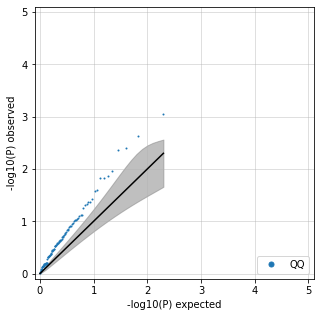

In [20]:
plotp.qqplot(results_df2["P-value"].values, xlim=[0,5], ylim=[0,5], addlambda=False, legend="QQ")

In [16]:
# print head of results data frame
import pandas as pd
pd.set_option('display.width', 1000)
results_df1.head(n=10)

,SetId,LogLikeAlt,LogLikeNull,P-value,#SNPs_in_Set,#ExcludedSNPs,chrm,pos. range,Alt_h2,Alt_a2
0,set_65,-703.888501,-707.609745,0.002564,10,0,1,650-659,0.029725,0.0
1,set_86,-704.240753,-707.609745,0.003768,10,0,1,860-869,0.030321,0.0
2,set_70,-704.525274,-707.609745,0.005158,10,0,1,700-709,0.029790,0.0
3,set_18,-704.920236,-707.609745,0.008020,10,0,1,180-189,0.024803,0.0
4,set_45,-705.410762,-707.609745,0.014031,10,0,1,450-459,0.023440,0.0
5,set_84,-705.507312,-707.609745,0.015693,10,0,1,840-849,0.024002,0.0
6,set_98,-705.623163,-707.609745,0.017965,10,0,1,980-989,0.022271,0.0
7,set_80,-705.728130,-707.609745,0.020327,10,0,1,800-809,0.023943,0.0
8,set_73,-706.000699,-707.609745,0.028153,10,0,1,730-739,0.019835,0.0
9,set_92,-706.166636,-707.609745,0.034473,10,0,1,920-929,0.019799,0.0


In [17]:
results_df2.head(n=10)

,SetId,P-value,#SNPs_in_Set,#ExcludedSNPs,test stat,chrm,pos. range
0,set_65,0.000868,10,0,768.040526,1,650-659
1,set_86,0.002380,10,0,691.092663,1,860-869
2,set_18,0.003898,10,0,678.776271,1,180-189
3,set_70,0.004237,10,0,649.314321,1,700-709
4,set_45,0.011045,10,0,577.470513,1,450-459
5,set_4,0.013719,10,0,567.383519,1,40-49
6,set_98,0.014582,10,0,562.042778,1,980-989
7,set_84,0.015098,10,0,554.594776,1,840-849
8,set_73,0.025359,10,0,511.163167,1,730-739
9,set_80,0.026253,10,0,518.324754,1,800-809


In [ ]:
# As just mentioned, we see inflation of the test statistic because no background GSM was used. 
# When you include a background GSM (using G0) type I error is better controlled. 
# As in the single SNP case, proximal contamination is avoided using LOOC.

In [21]:
bed_reader = Bed(example_file('tests/datasets/synth/all.*','*.bed'),count_A1=True)
chrNot1 = bed_reader[:,bed_reader.pos[:,0] != 1]
G0_fn = 'tempChrNot1.bed'
Bed.write(G0_fn,chrNot1.read(),count_A1=True)

# run SNP-set analysis
results_df3 = snp_set(test_snps=test_snps_fn, G0=G0_fn, set_list=set_list_fn, pheno=pheno_fn, covar=cov_fn, test="sc_davies")

(<Figure size 360x360 with 1 Axes>,
 array([2.30103000e+00, 1.82390874e+00, 1.60205999e+00, 1.45593196e+00,
        1.34678749e+00, 1.25963731e+00, 1.18708664e+00, 1.12493874e+00,
        1.07058107e+00, 1.02227639e+00, 9.78810701e-01, 9.39302160e-01,
        9.03089987e-01, 8.69666232e-01, 8.38631998e-01, 8.09668302e-01,
        7.82516056e-01, 7.56961951e-01, 7.32828272e-01, 7.09965389e-01,
        6.88246139e-01, 6.67561540e-01, 6.47817482e-01, 6.28932138e-01,
        6.10833916e-01, 5.93459820e-01, 5.76754126e-01, 5.60667306e-01,
        5.45155140e-01, 5.30177984e-01, 5.15700161e-01, 5.01689446e-01,
        4.88116639e-01, 4.74955193e-01, 4.62180905e-01, 4.49771647e-01,
        4.37707136e-01, 4.25968732e-01, 4.14539270e-01, 4.03402904e-01,
        3.92544977e-01, 3.81951903e-01, 3.71611070e-01, 3.61510743e-01,
        3.51639989e-01, 3.41988603e-01, 3.32547047e-01, 3.23306390e-01,
        3.14258261e-01, 3.05394801e-01, 2.96708622e-01, 2.88192771e-01,
        2.79840697e-01, 2.71

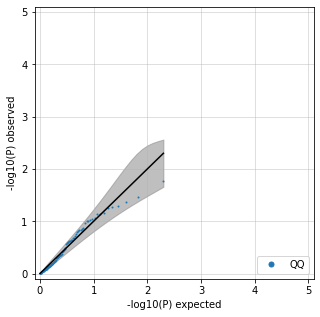

In [22]:
plotp.qqplot(results_df3["P-value"].values, xlim=[0,5], ylim=[0,5], addlambda=False, legend="QQ")